In [ ]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [ ]:
def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

def load_data_multi():
    data = np.loadtxt("data/ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y


In [ ]:
def compute_cost_test(target):
    # print("Using X with shape (4, 1)")
    # Case 1
    x = np.array([2, 4, 6, 8]).T
    y = np.array([7, 11, 15, 19]).T
    initial_w = 2
    initial_b = 3.0
    cost = target(x, y, initial_w, initial_b)
    assert cost == 0, f"Case 1: Cost must be 0 for a perfect prediction but got {cost}"

    # Case 2
    x = np.array([2, 4, 6, 8]).T
    y = np.array([7, 11, 15, 19]).T
    initial_w = 2.0
    initial_b = 1.0
    cost = target(x, y, initial_w, initial_b)
    assert cost == 2, f"Case 2: Cost must be 2 but got {cost}"

    # print("Using X with shape (5, 1)")
    # Case 3
    x = np.array([1.5, 2.5, 3.5, 4.5, 1.5]).T
    y = np.array([4, 7, 10, 13, 5]).T
    initial_w = 1
    initial_b = 0.0
    cost = target(x, y, initial_w, initial_b)
    assert np.isclose(cost, 15.325), f"Case 3: Cost must be 15.325 for a perfect prediction but got {cost}"

    # Case 4
    initial_b = 1.0
    cost = target(x, y, initial_w, initial_b)
    assert np.isclose(cost, 10.725), f"Case 4: Cost must be 10.725 but got {cost}"

    # Case 5
    y = y - 2
    initial_b = 1.0
    cost = target(x, y, initial_w, initial_b)
    assert  np.isclose(cost, 4.525), f"Case 5: Cost must be 4.525 but got {cost}"

    print("\033[92mAll tests passed!")

def compute_gradient_test(target):
    print("Using X with shape (4, 1)")
    # Case 1
    x = np.array([2, 4, 6, 8]).T
    y = np.array([4.5, 8.5, 12.5, 16.5]).T
    initial_w = 2.
    initial_b = 0.5
    dj_dw, dj_db = target(x, y, initial_w, initial_b)
    #assert dj_dw.shape == initial_w.shape, f"Wrong shape for dj_dw. {dj_dw} != {initial_w.shape}"
    assert dj_db == 0.0, f"Case 1: dj_db is wrong: {dj_db} != 0.0"
    assert np.allclose(dj_dw, 0), f"Case 1: dj_dw is wrong: {dj_dw} != [[0.0]]"

    # Case 2
    x = np.array([2, 4, 6, 8]).T
    y = np.array([4, 7, 10, 13]).T + 2
    initial_w = 1.5
    initial_b = 1
    dj_dw, dj_db = target(x, y, initial_w, initial_b)
    #assert dj_dw.shape == initial_w.shape, f"Wrong shape for dj_dw. {dj_dw} != {initial_w.shape}"
    assert dj_db == -2, f"Case 1: dj_db is wrong: {dj_db} != -2"
    assert np.allclose(dj_dw, -10.0), f"Case 1: dj_dw is wrong: {dj_dw} != -10.0"

    print("\033[92mAll tests passed!")




In [ ]:



#########################################################################
# Cost function
#
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities)
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    total_cost = 0
    for i in range(len(x)):
        # Compute predicted value
        predicted = x[i] * w  + b
        # Compute squared difference and add to total cost
        total_cost += (predicted - y[i]) ** 2

    # Divide by 2*m to get the average cost
    total_cost /= (2 * len(x))

    return total_cost


#########################################################################
# Gradient function
#
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    dj_dw = 0
    dj_db = 0

    for i in range(len(x)):
        # Compute predicted value
        predicted = x[i] * w  + b
        # Update gradients
        dj_dw += (predicted - y[i]) * x[i]
        dj_db += (predicted - y[i])

    # Divide by m to get average gradient
    dj_dw /= len(x)
    dj_db /= len(x)

    return dj_dw, dj_db


#########################################################################
# gradient descent
#
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
    x : (ndarray): Shape (m,)
    y : (ndarray): Shape (m,)
    w_in, b_in : (scalar) Initial values of parameters of the model
    cost_function: function to compute cost
    gradient_function: function to compute the gradient
    alpha : (float) Learning rate
    num_iters : (int) number of iterations to run gradient descent

    Returns:
    w : (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
    b : (scalar) Updated value of parameter of the model after running gradient descent
    J_history : (ndarray): Shape (num_iters,) J at each iteration, primarily for graphing later
    """

    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w_in, b_in)
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db
        J_history[i] = cost_function(x, y, w_in, b_in)

    return w_in, b_in, J_history





In [ ]:
print(compute_gradient_test(compute_gradient))


Using X with shape (4, 1)
All tests passed!
None


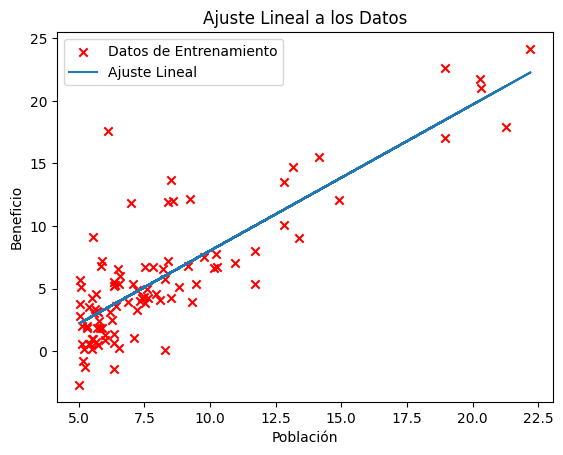

Beneficios predichos para 35,000 y 70,000 personas: [37.19239082 78.01507308]


In [ ]:
##Dibujar y

# Datos de entrenamiento
x,y = load_data()

# Parámetros iniciales y configuración del descenso de gradiente
w_in = 0
b_in = 0
alpha = 0.01
num_iters = 1500

# Ejecutar descenso de gradiente
w, b, J_history = gradient_descent(x, y, w_in, b_in, compute_cost, compute_gradient, alpha, num_iters)

# Graficar el ajuste lineal
plt.scatter(x, y, color='red', marker='x', label='Datos de Entrenamiento')
plt.plot(x, w*x + b, label='Ajuste Lineal')
plt.xlabel('Población')
plt.ylabel('Beneficio')
plt.title('Ajuste Lineal a los Datos')
plt.legend()
plt.show()

# Predicciones para poblaciones de 35.000 y 70.000
x_pred = np.array([3.5, 7]) * 10
predictions = w * x_pred + b
print("Beneficios predichos para 35,000 y 70,000 personas:", predictions)